In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

In [11]:
df=pd.read_csv('train_Data.csv')

In [12]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [13]:
df_min=df[df['9']==1]

In [14]:
df_min.to_csv('wisconsin_minority_train.csv',index=False)
df_min=pd.read_csv('wisconsin_minority_train.csv')

In [15]:
df_majority=df[df['9']==0]
df_majority.to_csv('wisconsin_majority_train.csv',index=False)
df_majority=pd.read_csv('wisconsin_majority_train.csv')

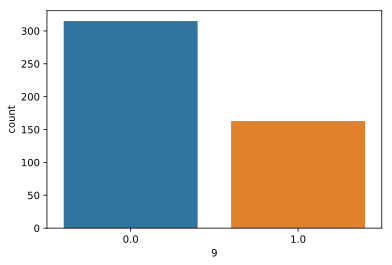

In [17]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [18]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [19]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(157, 5, 10)
(157, 10)


In [20]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [21]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model.compile(loss='mse',optimizer='adam')

In [23]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
94/94 [==============================] - 3s 31ms/step - loss: 0.4404
Epoch 2/500
94/94 [==============================] - 0s 619us/step - loss: 0.4046
Epoch 3/500
94/94 [==============================] - 0s 533us/step - loss: 0.3700
Epoch 4/500
94/94 [==============================] - 0s 555us/step - loss: 0.3392
Epoch 5/500
94/94 [==============================] - 0s 560us/step - loss: 0.3126
Epoch 6/500
94/94 [==============================] - 0s 560us/step - loss: 0.2883
Epoch 7/500
94/94 [==============================] - 0s 517us/step - loss: 0.2680
Epoch 8/500
94/94 [==============================] - 0s 597us/step - loss: 0.2495
Epoch 9/500
94/94 [==============================] - 0s 544us/step - loss: 0.2333
Epoch 10/500
94/94 [==============================] - 0s 559us/step - loss: 0.2185
Epoch 11/500
94/94 [==============================] - 0s 661us/step - loss: 0.2054
Epoch 12/500
94/94 [==============================] - 0s 683us/step - loss: 0.1938
Epoch 13/500
9

94/94 [==============================] - 0s 608us/step - loss: 0.0776
Epoch 100/500
94/94 [==============================] - 0s 555us/step - loss: 0.0775
Epoch 101/500
94/94 [==============================] - 0s 587us/step - loss: 0.0775
Epoch 102/500
94/94 [==============================] - 0s 533us/step - loss: 0.0774
Epoch 103/500
94/94 [==============================] - 0s 576us/step - loss: 0.0774
Epoch 104/500
94/94 [==============================] - 0s 528us/step - loss: 0.0773
Epoch 105/500
94/94 [==============================] - 0s 576us/step - loss: 0.0773
Epoch 106/500
94/94 [==============================] - 0s 555us/step - loss: 0.0772
Epoch 107/500
94/94 [==============================] - 0s 523us/step - loss: 0.0772
Epoch 108/500
94/94 [==============================] - 0s 523us/step - loss: 0.0771
Epoch 109/500
94/94 [==============================] - 0s 533us/step - loss: 0.0771
Epoch 110/500
94/94 [==============================] - 0s 555us/step - loss: 0.0770
Epoch 

94/94 [==============================] - 0s 533us/step - loss: 0.0731
Epoch 197/500
94/94 [==============================] - 0s 576us/step - loss: 0.0731
Epoch 198/500
94/94 [==============================] - 0s 555us/step - loss: 0.0730
Epoch 199/500
94/94 [==============================] - 0s 555us/step - loss: 0.0730
Epoch 200/500
94/94 [==============================] - 0s 533us/step - loss: 0.0730
Epoch 201/500
94/94 [==============================] - 0s 529us/step - loss: 0.0729
Epoch 202/500
94/94 [==============================] - 0s 512us/step - loss: 0.0729
Epoch 203/500
94/94 [==============================] - 0s 555us/step - loss: 0.0728
Epoch 204/500
94/94 [==============================] - 0s 533us/step - loss: 0.0728
Epoch 205/500
94/94 [==============================] - 0s 523us/step - loss: 0.0729
Epoch 206/500
94/94 [==============================] - 0s 512us/step - loss: 0.0727
Epoch 207/500
94/94 [==============================] - 0s 512us/step - loss: 0.0726
Epoch 

94/94 [==============================] - 0s 597us/step - loss: 0.0686
Epoch 294/500
94/94 [==============================] - 0s 576us/step - loss: 0.0685
Epoch 295/500
94/94 [==============================] - 0s 544us/step - loss: 0.0684
Epoch 296/500
94/94 [==============================] - 0s 544us/step - loss: 0.0683
Epoch 297/500
94/94 [==============================] - 0s 619us/step - loss: 0.0683
Epoch 298/500
94/94 [==============================] - 0s 523us/step - loss: 0.0683
Epoch 299/500
94/94 [==============================] - 0s 544us/step - loss: 0.0681
Epoch 300/500
94/94 [==============================] - 0s 523us/step - loss: 0.0684
Epoch 301/500
94/94 [==============================] - 0s 533us/step - loss: 0.0681
Epoch 302/500
94/94 [==============================] - 0s 544us/step - loss: 0.0680
Epoch 303/500
94/94 [==============================] - 0s 619us/step - loss: 0.0680
Epoch 304/500
94/94 [==============================] - 0s 597us/step - loss: 0.0681
Epoch 

94/94 [==============================] - 0s 512us/step - loss: 0.0628
Epoch 391/500
94/94 [==============================] - 0s 597us/step - loss: 0.0628
Epoch 392/500
94/94 [==============================] - 0s 539us/step - loss: 0.0628
Epoch 393/500
94/94 [==============================] - 0s 528us/step - loss: 0.0627
Epoch 394/500
94/94 [==============================] - 0s 528us/step - loss: 0.0629
Epoch 395/500
94/94 [==============================] - 0s 539us/step - loss: 0.0627
Epoch 396/500
94/94 [==============================] - 0s 555us/step - loss: 0.0624
Epoch 397/500
94/94 [==============================] - 0s 555us/step - loss: 0.0628
Epoch 398/500
94/94 [==============================] - 0s 544us/step - loss: 0.0626
Epoch 399/500
94/94 [==============================] - 0s 512us/step - loss: 0.0623
Epoch 400/500
94/94 [==============================] - 0s 523us/step - loss: 0.0620
Epoch 401/500
94/94 [==============================] - 0s 547us/step - loss: 0.0621
Epoch 

94/94 [==============================] - 0s 629us/step - loss: 0.0568
Epoch 488/500
94/94 [==============================] - 0s 672us/step - loss: 0.0564
Epoch 489/500
94/94 [==============================] - 0s 651us/step - loss: 0.0564
Epoch 490/500
94/94 [==============================] - 0s 523us/step - loss: 0.0562
Epoch 491/500
94/94 [==============================] - 0s 544us/step - loss: 0.0561
Epoch 492/500
94/94 [==============================] - 0s 564us/step - loss: 0.0561
Epoch 493/500
94/94 [==============================] - 0s 571us/step - loss: 0.0561
Epoch 494/500
94/94 [==============================] - 0s 581us/step - loss: 0.0558
Epoch 495/500
94/94 [==============================] - 0s 603us/step - loss: 0.0558
Epoch 496/500
94/94 [==============================] - 0s 597us/step - loss: 0.0559
Epoch 497/500
94/94 [==============================] - 0s 629us/step - loss: 0.0558
Epoch 498/500
94/94 [==============================] - 0s 533us/step - loss: 0.0558
Epoch 

In [24]:
model.save('7-24-2019-wisconsin-v1.h5')

In [25]:
Xtrain.shape

(94, 5, 10)

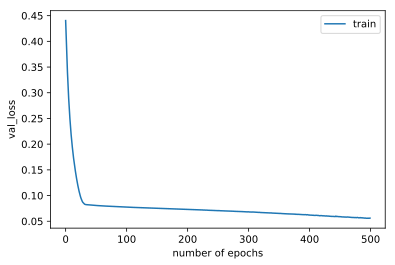

In [26]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [27]:
prediction=model.predict(xtest)

In [28]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

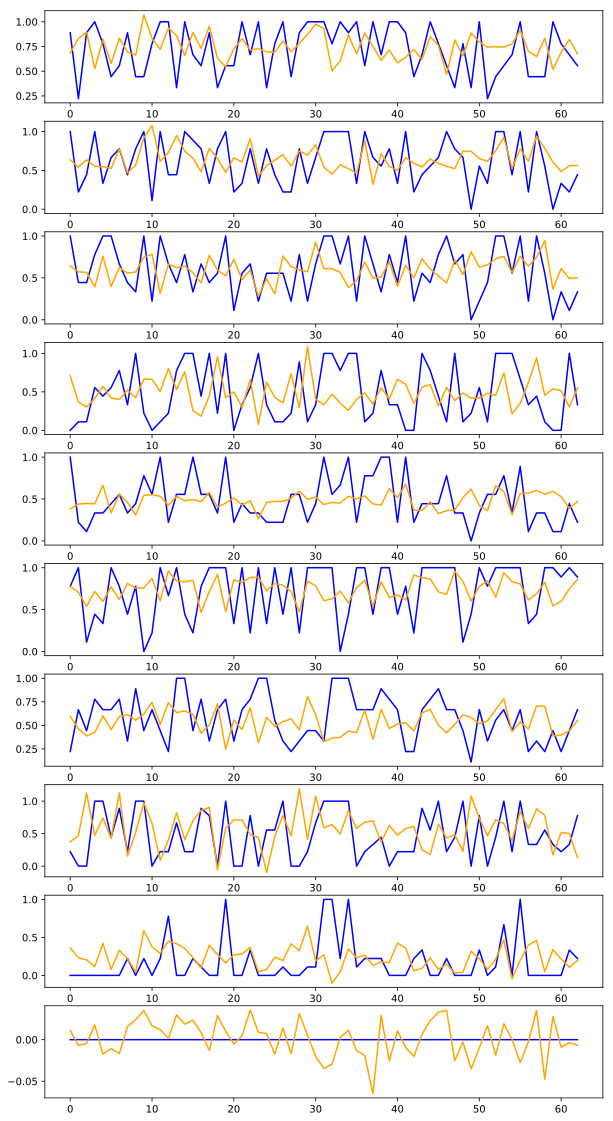

In [29]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [30]:
prediction

array([[ 6.82809770e-01,  6.36656702e-01,  6.41728759e-01,
         7.08352566e-01,  3.82321715e-01,  7.75136948e-01,
         5.94726741e-01,  3.75759363e-01,  3.61539841e-01,
         1.11769140e-02],
       [ 8.29344273e-01,  5.41818202e-01,  5.72296917e-01,
         3.65332097e-01,  4.39817160e-01,  7.05582082e-01,
         4.64381099e-01,  4.69912946e-01,  2.32404843e-01,
        -7.00099766e-03],
       [ 8.96445990e-01,  6.36018813e-01,  5.66005588e-01,
         3.03924203e-01,  4.47437197e-01,  5.38319409e-01,
         3.87633622e-01,  1.12367988e+00,  2.04837158e-01,
        -4.63481247e-03],
       [ 5.25073051e-01,  5.52304626e-01,  3.94267708e-01,
         4.15144801e-01,  4.42412376e-01,  7.16605604e-01,
         4.24580157e-01,  4.72475350e-01,  1.14908546e-01,
         1.75613910e-02],
       [ 8.24966133e-01,  5.49482167e-01,  7.60817826e-01,
         5.70837080e-01,  6.63698852e-01,  5.97528577e-01,
         6.01533473e-01,  7.40777075e-01,  4.21708226e-01,
        -1.

In [31]:
prediction2=scaler.inverse_transform(prediction)

In [32]:
ytest2=scaler.inverse_transform(ytest)

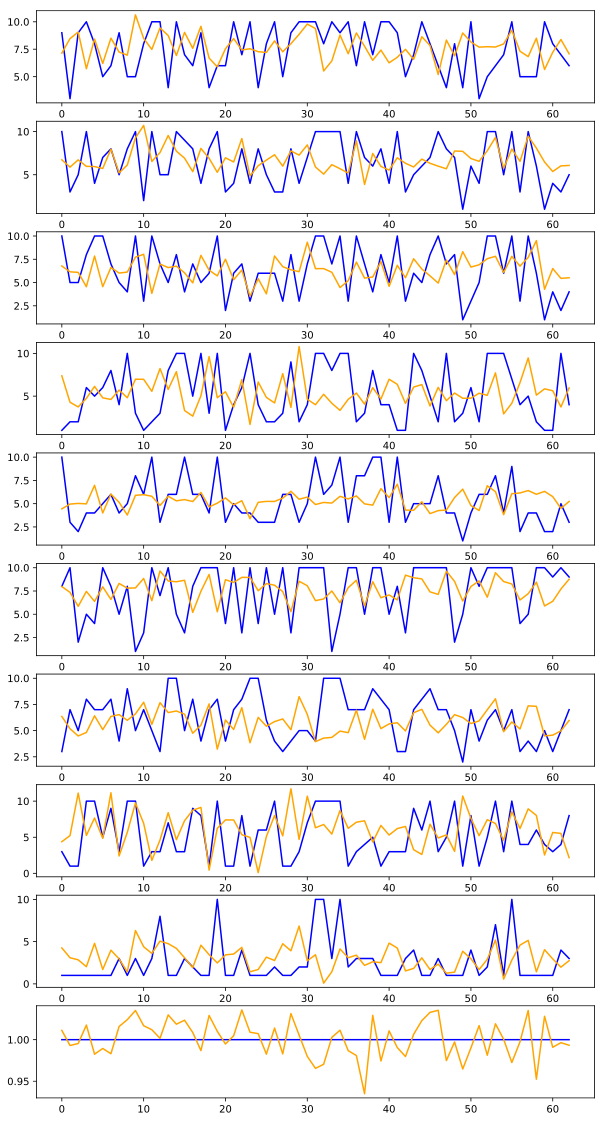

In [33]:
draw_prediction(ytest2,prediction2,clmns)

In [34]:
prediction

array([[ 6.82809770e-01,  6.36656702e-01,  6.41728759e-01,
         7.08352566e-01,  3.82321715e-01,  7.75136948e-01,
         5.94726741e-01,  3.75759363e-01,  3.61539841e-01,
         1.11769140e-02],
       [ 8.29344273e-01,  5.41818202e-01,  5.72296917e-01,
         3.65332097e-01,  4.39817160e-01,  7.05582082e-01,
         4.64381099e-01,  4.69912946e-01,  2.32404843e-01,
        -7.00099766e-03],
       [ 8.96445990e-01,  6.36018813e-01,  5.66005588e-01,
         3.03924203e-01,  4.47437197e-01,  5.38319409e-01,
         3.87633622e-01,  1.12367988e+00,  2.04837158e-01,
        -4.63481247e-03],
       [ 5.25073051e-01,  5.52304626e-01,  3.94267708e-01,
         4.15144801e-01,  4.42412376e-01,  7.16605604e-01,
         4.24580157e-01,  4.72475350e-01,  1.14908546e-01,
         1.75613910e-02],
       [ 8.24966133e-01,  5.49482167e-01,  7.60817826e-01,
         5.70837080e-01,  6.63698852e-01,  5.97528577e-01,
         6.01533473e-01,  7.40777075e-01,  4.21708226e-01,
        -1.

In [35]:
new_data=pd.DataFrame(prediction2)

In [36]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)